In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# Import CSV
Vivino = pd.read_csv('vivino_wine_final.csv',encoding = "ISO-8859-1")
Vivino.head()

,winery,wine_type,city,country,wine_name,year,overall_rating,overall_rating_count,price,light_bold,smooth_tannic,dry_sweet,soft_acidic
0,Daring Escape,Red wine,California,United States,Red,2017,4.2,30,6.99,75.7310,54.6576,6.92299,64.80330
1,Bodegas Aragonesas,Red wine,Campo de Borja,Spain,Don Ramón Pérez Juan,2018,3.9,1485,8.99,60.5850,33.9988,4.56559,39.85480
2,New Age,Red wine,Mendoza,Argentina,Tinto Dulce,-1,3.9,412,8.99,-1.0000,-1.0000,-1.00000,-1.00000
3,Bodegas Virgen de la Sierra,Red wine,Calatayud,Spain,OGV Old Vines Garnacha,2018,3.9,175,8.99,79.8066,35.5530,4.50972,45.23960
4,Mirassou,Red wine,California,United States,Merlot,2018,3.9,68,8.99,60.1532,15.9529,19.61040,8.63218


In [16]:
# Look at the numerical variables
Vivino.describe()

,year,overall_rating,overall_rating_count,price,light_bold,smooth_tannic,dry_sweet,soft_acidic
count,44933.000000,44933.000000,44933.000000,44933.000000,44933.000000,44933.000000,44933.00000,44933.000000
mean,2009.791445,3.998122,426.470345,75.365922,57.657922,41.819262,7.07189,48.690204
std,86.163109,0.338457,1242.434541,108.794727,22.172399,19.220620,7.65284,19.457715
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000
25%,2012.000000,3.800000,56.000000,18.990000,44.732400,27.993300,1.74544,41.200100
50%,2015.000000,4.000000,129.000000,40.000000,62.650900,46.465100,5.32136,50.815800
75%,2017.000000,4.200000,361.000000,82.990000,77.118900,54.253300,9.68328,61.890800
max,2020.000000,4.900000,134439.000000,4499.970000,80.000000,80.000000,55.52860,80.000000


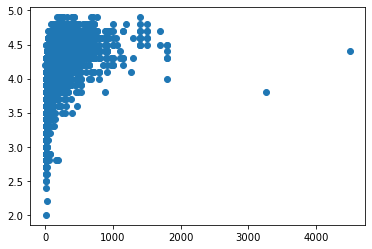

In [29]:
# Look at overall rating & price without the 'nulls' or -1
Vivino_rate_price = Vivino[(Vivino['overall_rating'] != -1) & (Vivino['price'] != -1)]
plt.scatter(Vivino_rate_price['price'],Vivino_rate_price['overall_rating'])

Text(0, 0.5, 'Overall Rating')

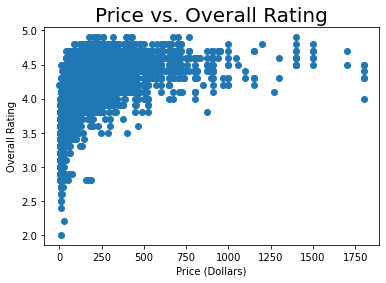

In [31]:
# Remove some outliers for visibility
Vivino_rate_price2 = Vivino_rate_price[Vivino_rate_price['price'] < 2500]
plt.scatter(Vivino_rate_price2['price'],Vivino_rate_price2['overall_rating'])
plt.title('Price vs. Overall Rating', fontsize = 20)
plt.xlabel('Price (Dollars)')
plt.ylabel('Overall Rating')